# Comparative Analysis
In this notebook, we compare ClaSS with competitors.

In [316]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [317]:
import numpy as np

import pandas as pd

pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import gc
import Orange
import sys

sys.path.append("../../")

from tqdm import tqdm

Let's choose a score for evaluation (F1 or Covering).

In [318]:
eval_score = "covering_score"

Let's load the scores from the different methods.

In [319]:
competitors = ["NEWMA", "HDDM", "ADWIN", "DDM", "Window", "FLOSS", "ChangeFinder", "ClaSS"]
datasets = ["PAMAP", "mHealth", "WESAD", "MIT-BIH-VE", "MIT-BIH-Arr", "SleepDB"]
methods, dfs = list(), list()

for candidate_name in competitors:
    methods.append((candidate_name, f"{candidate_name}.csv.gz"))

for idx, (name, file_name) in enumerate(tqdm(methods)):
    df = []

    for d in datasets:
        df.append(pd.read_csv(f"../../experiments/competitor_{d}/{file_name}", usecols=["dataset", eval_score],
                              compression="gzip"))

    df = pd.concat(df)
    df.sort_values(by="dataset", inplace=True)
    dfs.append((name, df))

    gc.collect()

df_scores = pd.DataFrame()

for name, df in dfs:
    df_scores["dataset"] = df.dataset
    df_scores[name] = df[eval_score]

df_scores.reset_index(drop=True, inplace=True)
df_scores

100%|██████████| 8/8 [00:01<00:00,  5.60it/s]


,dataset,NEWMA,HDDM,ADWIN,DDM,Window,FLOSS,ChangeFinder,ClaSS
0,MIT-BIH-Arr_MLII_Subject100,1.000,1.000,0.041,1.000,1.000,0.500,0.167,0.659
1,MIT-BIH-Arr_MLII_Subject101,1.000,0.714,0.040,1.000,1.000,0.234,0.304,0.516
2,MIT-BIH-Arr_MLII_Subject103,1.000,0.605,0.035,1.000,1.000,0.291,0.463,0.329
3,MIT-BIH-Arr_MLII_Subject105,1.000,0.470,0.066,1.000,1.000,0.123,0.669,0.306
4,MIT-BIH-Arr_MLII_Subject106,0.126,0.353,0.297,0.126,0.126,0.306,0.169,0.372
5,MIT-BIH-Arr_MLII_Subject107,1.000,0.016,0.066,1.000,1.000,0.148,0.049,0.442
6,MIT-BIH-Arr_MLII_Subject108,1.000,0.188,0.026,1.000,1.000,0.098,0.092,0.186
7,MIT-BIH-Arr_MLII_Subject109,1.000,0.872,0.169,1.000,1.000,0.536,0.339,0.267
8,MIT-BIH-Arr_MLII_Subject111,1.000,0.134,0.026,1.000,1.000,0.083,0.125,0.276
9,MIT-BIH-Arr_MLII_Subject112,1.000,0.444,0.032,1.000,1.000,0.228,0.222,0.389


Let's calculate the mean/median/std score.

In [320]:
df_scores.mean(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4032/3088260556.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.mean(axis=0).round(3)


NEWMA           0.215
HDDM            0.246
ADWIN           0.262
DDM             0.262
Window          0.291
FLOSS           0.356
ChangeFinder    0.423
ClaSS           0.515
dtype: float64

In [321]:
df_scores.median(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4032/803467923.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.median(axis=0).round(3)


NEWMA           0.116
HDDM            0.234
ADWIN           0.206
DDM             0.171
Window          0.220
FLOSS           0.359
ChangeFinder    0.416
ClaSS           0.493
dtype: float64

In [322]:
df_scores.std(axis=0).round(3)

/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4032/2527189798.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_scores.std(axis=0).round(3)


NEWMA           0.262
HDDM            0.185
ADWIN           0.205
DDM             0.245
Window          0.277
FLOSS           0.130
ChangeFinder    0.197
ClaSS           0.171
dtype: float64

Let's define the sensor types to constrain the scores.

In [323]:
# sensors
ECG = ("MIT-BIH", "ECG")
ACC = ("ACC", "Acc")
GYRO = ("Gyro",)
MAG = ("Mag",)
EEG = ("EEG",)
EOG = ("EOG",)
EMG = ("EMG",)
EDA = ("EDA",)
Resp = ("Resp",)
Temp = ("Temp",)

df_sel = df_scores[df_scores.dataset.apply(lambda d: any(sensor in d for sensor in ECG))]
# df_sel.shape

In [324]:
# df_sel = df_scores[df_scores.dataset.apply(lambda n: "MIT-BIH-Arr" in n)]

Let's compute the wins per method.

In [325]:
ranks = df_scores.rank(1, method='min', ascending=False)
means = np.array(ranks.mean(axis=0))

In [326]:
for mean, name in zip(means, df_scores.columns[1:]):
    print(f"{name}:wins={ranks[ranks[name] == 1].shape[0]} rank={np.round(mean, 1)}")

NEWMA:wins=45 rank=5.4
HDDM:wins=21 rank=5.0
ADWIN:wins=25 rank=4.7
DDM:wins=41 rank=4.8
Window:wins=65 rank=4.5
FLOSS:wins=45 rank=3.7
ChangeFinder:wins=95 rank=3.1
ClaSS:wins=227 rank=2.1


Let's plot and output the ranks.

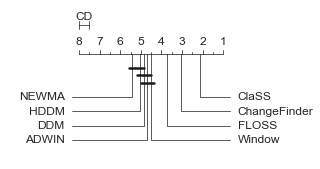

In [327]:
cd = Orange.evaluation.scoring.compute_CD(means, df_scores.shape[0])
Orange.evaluation.scoring.graph_ranks(means, df_scores.columns[1:], cd=cd, reverse=True, width=4,
                                      filename=f"../../figures/cd_comparative_archives.pdf")  #

Let's compute wins/losses against ClaSS.

In [328]:
selection = "ClaSS"

for rival in df_scores.columns[1:]:
    if rival == selection: continue

    df_pair = df_scores[[selection, rival]]
    pair_ranks = df_pair.rank(1, method='min', ascending=False)

    wins = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 2)].shape[0]
    losses = pair_ranks[(pair_ranks[selection] == 2) & (pair_ranks[rival] == 1)].shape[0]
    ties = pair_ranks[(pair_ranks[selection] == 1) & (pair_ranks[rival] == 1)].shape[0]

    assert wins + losses + ties == pair_ranks.shape[0]

    print(f"{selection} vs {rival}: (wins/ties/losses): {wins}/{ties}/{losses}")

ClaSS vs NEWMA: (wins/ties/losses): 426/3/56
ClaSS vs HDDM: (wins/ties/losses): 422/1/62
ClaSS vs ADWIN: (wins/ties/losses): 441/1/43
ClaSS vs DDM: (wins/ties/losses): 419/3/63
ClaSS vs Window: (wins/ties/losses): 386/3/96
ClaSS vs FLOSS: (wins/ties/losses): 399/2/84
ClaSS vs ChangeFinder: (wins/ties/losses): 336/3/146


/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4032/1875072989.py:8: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)
/var/folders/5_/fv_bzq1n4n76j6l_jqgndj6c0000gn/T/ipykernel_4032/1875072989.py:11: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(fontsize)


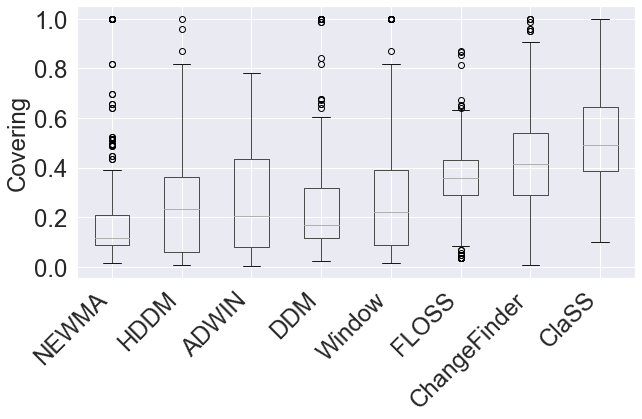

In [329]:
fontsize = 24
_, ax = plt.subplots(figsize=(10, 5))

df_scores.boxplot(ax=ax, rot=90)
ax.set_ylabel("Covering", fontsize=fontsize)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(fontsize)

ax.set_xticklabels(df_scores.columns[1:], rotation=45, ha="right")
ax.set_yticks(np.round(np.arange(0, 1.0 + .2, .2), 1))

plt.savefig(f"../../figures/bp_comparative_archives.pdf", bbox_inches="tight")

In [330]:
df_scores.shape

(485, 9)